In [1]:
import pandas as pd
import networkx as nx
import itertools

In [2]:

file_path = 'Liguori_translations_FR_normalized_publishers_translators_places.xlsx'
df = pd.read_excel(file_path)

In [3]:
df

,First ed.,Subsq. ed.,Editions,Ed. #,Digital file,Unnamed: 4,Author,Title,Unnamed: 7,Publisher,...,End matter,Images,Notes,Full title,Source lg,Original title,Original pub place,Original year,Normalized Publisher,Normalized Translator
0,1804.0,1894,2,2nd ed.,NaN,NaN,Alphonse de Liguori (1696-1787 ; saint),Abrégé de la théologie morale de S. Alphonse d...,NaN,Duculot-Roulin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,duculotroulin,"frassinetti, g"
1,1832.0,1834,3,3rd (1834),https://www.google.se/books/edition/Amour_des_...,NaN,Alphonse de Liguori (1696-1787 ; saint),"Amour des Âmes, ou Réflections (""sic"") et affe...",NaN,Vial; Béthune; Sauvignet et Honorat,...,none,yes,NaN,NaN,NaN,NaN,NaN,NaN,vial; bthune; sauvignet,NaN
2,1835.0,NaN,1,NaN,https://www.google.se/books/edition/Horloge_de...,NaN,Alphonse de Liguori (1696-1787 ; saint),"Amour des Âmes, ou Réflections (""sic"") et affe...",NaN,F. Guyot,...,none,none,NaN,NaN,Italian,NaN,NaN,NaN,guyot,NaN
3,1835.0,NaN,1,NaN,NaN,NaN,Alphonse de Liguori (1696-1787 ; saint),"Amour des Âmes, ou Réflections (""sic"") et affe...",NaN,J. Mossy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mossy,NaN
4,1865.0,1868,2,NaN,NaN,NaN,Alphonse de Liguori (1696-1787 ; saint),"Amour des Âmes, ou Réflections (""sic"") et affe...",NaN,R. Ruffet,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ruffet,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,1867.0,NaN,1,NaN,NaN,NaN,L.C. Bourquard & saint Alphonse de Liguori,Le livre des missions : recueil d'instructions...,NaN,Benziger,...,NaN,NaN,NaN,Le livre des missions : recueil d'instructions...,NaN,NaN,NaN,NaN,benziger,NaN
643,1882.0,NaN,2,2 editions at least,NaN,NaN,"Liguori, Alphonsus Maria de (1696-1787) - sanc...",Gloires de Marie,NaN,SaintPaul,...,NaN,NaN,Trad. nouv,Les gloires de Marie,NaN,NaN,NaN,NaN,saintpaul,"pladys, e"
644,1883.0,NaN,1,NaN,NaN,NaN,"Liguori, Alphonsus Maria de (1696-1787) - sanc...",Le Rosaire expliqué par Saint Alphone de L. Ex...,NaN,SaintPaul,...,NaN,NaN,NaN,Le Rosaire expliqué par Saint Alphone de L. Ex...,NaN,NaN,NaN,NaN,saintpaul,NaN
645,1840.0,NaN,1,NaN,NaN,NaN,NaN,La vie de Saint-Alphonse-Marie de Liguori,NaN,NaN,...,NaN,NaN,NaN,La vie de Saint-Alphonse-Marie de Liguori,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
import math

In [38]:
number_1825 = 0

for y in df['First ed.']:
    if not math.isnan(y) and int(y) <= 1825:
        # print(y)
        number_1825 += 1
        #print(number_1825)

In [39]:
number_1825

63

In [40]:

number_1826_50 = 0

for y in df['First ed.']:
    if not math.isnan(y) and 1825 < int(y) and int(y) <= 1850:
        # print(y)
        number_1826_50 += 1

In [41]:
number_1826_50

319

In [42]:

number_1851_75 = 0

for y in df['First ed.']:
    if not math.isnan(y) and 1850 < int(y) and int(y) <= 1875:
        # print(y)
        number_1851_75 += 1

In [43]:
number_1851_75

161

In [44]:
number_1876_1900 = 0

for y in df['First ed.']:
    if not math.isnan(y) and 1875 < int(y) and int(y) <= 1910:
        # print(y)
        number_1876_1900 += 1

In [45]:

number_1876_1900

95

In [17]:

number_1826_38 = 0

for y in df['First ed.']:
    if not math.isnan(y) and 1825 < int(y) and int(y) <= 1838:
        # print(y)
        number_1826_38 += 1

In [18]:

number_1826_38

212

In [19]:

number_1839_50 = 0

for y in df['First ed.']:
    if not math.isnan(y) and 1838 < int(y) and int(y) <= 1850:
        # print(y)
        number_1839_50 += 1

In [20]:
number_1839_50

107

In [6]:

G_thru_1825 = nx.MultiDiGraph()

# Function to extract and sort years chronologically
def extract_years(row, cutoff_year):
    year = row['First ed.']
    subsequent = row['Subsq. ed.']
    
    # Extract and filter years based on the cutoff year
    all_years = []
    
    if not math.isnan(year) and int(year) <= cutoff_year:
    #if isinstance(year, (int, float)) and year < cutoff_year:
        all_years.append(int(year))
    
    if isinstance(subsequent, str):
        #subsequent_years = [int(x.split()[0]) for x in subsequent.split(',') if not (math.isnan(x) or not int(x.split()[0]) <= cutoff_year) else None]
        subsequent_years = [
            int(x.split()[0]) for x in subsequent.split(',')
            if x.strip() and not math.isnan(float(x.strip())) and int(x.split()[0]) <= cutoff_year
            ]
        all_years.extend(subsequent_years)

    all_years = sorted(all_years)
    
    return all_years


def is_valid_year(x):
    try:
        year_int = int(x)
        return year_int <= 1825
    except ValueError:
        return False
    

filtered_df = df[df['First ed.'].apply(lambda x: x if not (math.isnan(x) or not is_valid_year(x)) else None).notna()]

unique_publishers = set()

for publishers in filtered_df['Normalized Publisher']:
    if isinstance(publishers, str):
        unique_publishers.update([publisher.strip() for publisher in publishers.split(';')])
    else:
        unique_publishers.update([publishers])

for publisher in unique_publishers:
    G_thru_1825.add_node(publisher, publications=[])
    

for index, row in filtered_df.iterrows():
    title = row['Title']
    years = extract_years(row, 1825)
    editions = sum(1 for year in years) if years != [] else 0  # Calculate number of editions based on years before 1851
    publishers = [publisher.strip() for publisher in row['Normalized Publisher'].split('; ')] if isinstance(row['Normalized Publisher'], str) else [row['Normalized Publisher']]
    translator = row['Normalized Translator']
    places = [place.strip() for place in row['Publ. place'].split('; ')] if isinstance(row['Publ. place'], str) else [str(row['Publ. place']).strip()]

    for publisher in unique_publishers:
        if publisher in publishers:
            G_thru_1825.nodes[publisher]['publications'].append({
                'title': title,
                'years': years,
                'editions': [editions],
                'publisher': publishers,
                'translator': translator,
                'place': places
            })


for publisher in G_thru_1825.nodes():
    if 'publications' in G_thru_1825.nodes[publisher]:  # Check if 'publications' key exists
        magnitude = sum(pub['editions'][0] for pub in G_thru_1825.nodes[publisher]['publications'])
        G_thru_1825.nodes[publisher]['magnitude'] = magnitude

In [7]:

len(G_thru_1825.nodes)

54

In [48]:

nodes_with_sizes_1825 = [(publisher, data['magnitude']) for publisher, data in G_thru_1825.nodes(data=True) if 'magnitude' in data]

sorted_nodes_1825 = sorted(nodes_with_sizes_1825, key=lambda x: x[1], reverse=True)

for publisher, size in sorted_nodes_1825:
    print(f"Publisher: {publisher}, Size: {size}")

Publisher: perisse, Size: 11
Publisher: rusand, Size: 9
Publisher: chambeau, Size: 4
Publisher: chaul, Size: 3
Publisher: hanicq, Size: 3
Publisher: mquignon, Size: 3
Publisher: carez, Size: 2
Publisher: lefort, Size: 2
Publisher: vannier, Size: 2
Publisher: fischer, Size: 2
Publisher: bellegarrigue, Size: 2
Publisher: hissette, Size: 1
Publisher: degouy, Size: 1
Publisher: savy, Size: 1
Publisher: libraire ecclsiastique, Size: 1
Publisher: galles, Size: 1
Publisher: prudont, Size: 1
Publisher: delalain, Size: 1
Publisher: caron, Size: 1
Publisher: aumont, Size: 1
Publisher: boissel, Size: 1
Publisher: librairie de la socit typographique, Size: 1
Publisher: dehansy, Size: 1
Publisher: goy, Size: 1
Publisher: fauvet jaune, Size: 1
Publisher: darnaultmaurant, Size: 1
Publisher: nyon, Size: 1
Publisher: mellinetmalassis, Size: 1
Publisher: manavit, Size: 1
Publisher: saintmichel, Size: 1
Publisher: mguinon, Size: 1
Publisher: lambertgentot, Size: 1
Publisher: mame, Size: 1
Publisher: deck

In [8]:

def add_edge_with_attributes(G, publisher_A, publisher_B, title, source_years, target_years,
                             source_translator, target_translator, source_num_editions,
                             target_num_editions, source_place, target_place, weight, relation, key):
    G.add_edge(publisher_A, publisher_B, title=title, source_years=source_years, target_years=target_years,
               source_translator=source_translator, target_translator=target_translator,
               source_num_editions=source_num_editions, target_num_editions=target_num_editions,
               source_place=source_place, target_place=target_place, weight=weight, relation=relation, key=key)

In [9]:
existing_edges = set()

# Function to add edges between publishers with support for multiple edges of the same type
def add_edges_between_publishers(G):
    for pub_A, pub_B in itertools.combinations(G.nodes, 2):  # Iterate over pairs of nodes
        publications_A = G.nodes[pub_A]['publications']
        publications_B = G.nodes[pub_B]['publications']
        
        # Compare all publications between two publishers
        for publication_A in publications_A:
            for publication_B in publications_B:
                title_A, title_B = publication_A['title'], publication_B['title']
                years_A, years_B = publication_A['years'], publication_B['years']
                editions_A, editions_B = publication_A['editions'], publication_B['editions']
                translators_A, translators_B = publication_A['translator'], publication_B['translator']
                publishers_A, publishers_B = set(publication_A['publisher']), set(publication_B['publisher'])
                
                # Ensure translators_A and translators_B are lists
                translators_A = translators_A if isinstance(translators_A, list) else []
                translators_B = translators_B if isinstance(translators_B, list) else []

                
                # Initialize edge counters
                edge_counter = 0

                # Check for copublication
                if (len(publishers_A) == 1 & len(publishers_B) == 1) and title_A == title_B and set(years_A) == set(years_B):
                    # Create a unique edge key
                    edge_counter = sum(1 for key in existing_edges if f"copub_{pub_A}_{pub_B}_" in key) + 1
                    edge_key = f"copub_{pub_A}_{pub_B}_{title_A}_{edge_counter}"

                    # Check if the edge already exists
                    if edge_key not in existing_edges:
                        weight = max(editions_A[0], editions_B[0])
                        add_edge_with_attributes(
                            G, pub_A, pub_B, title_A, years_A, years_B, translators_A, translators_B,
                            editions_A, editions_B, publication_A['place'], publication_B['place'],
                            weight, 'copublication', edge_key
                        )
                        existing_edges.add(edge_key)

                # Check for reprint relation
                if set(translators_A) == set(translators_B) and title_A == title_B and years_A and years_B:
                    if len(years_A) > 0 and len(years_B) > 0:
                        if years_A[0] < years_B[0] and publishers_A != publishers_B:
                            edge_counter += 1
                            edge_key = f"reprint_{pub_A}_{pub_B}_{title_A}_{edge_counter}"

                            # Check if the edge already exists
                            if edge_key not in existing_edges:
                                weight = editions_B[0]
                                add_edge_with_attributes(
                                    G, pub_A, pub_B, title_A, years_A, years_B, translators_A, translators_B,
                                    editions_A, editions_B, publication_A['place'], publication_B['place'],
                                    weight, 'reprint', edge_key
                                )
                                existing_edges.add(edge_key)

                # Check for retranslation relation
                if set(translators_A) != set(translators_B) and title_A == title_B and years_A and years_B:
                    if len(years_A) > 0 and len(years_B) > 0:
                        if years_A[0] < years_B[0] and publishers_A != publishers_B:
                            edge_counter += 1
                            edge_key = f"retrans_{pub_A}_{pub_B}_{title_A}_{edge_counter}"

                            # Check if the edge already exists
                            if edge_key not in existing_edges:
                                weight = editions_B[0]
                                add_edge_with_attributes(
                                    G, pub_A, pub_B, title_A, years_A, years_B, translators_A, translators_B,
                                    editions_A, editions_B, publication_A['place'], publication_B['place'],
                                    weight, 'retranslation', edge_key
                                )
                                existing_edges.add(edge_key)

In [10]:

add_edges_between_publishers(G_thru_1825)

In [11]:
len(G_thru_1825.edges)

423

In [12]:
len(existing_edges)

423

In [13]:

for title, first_ed, subsq_ed, edition, publisher, translator, place in zip(
        filtered_df['Title'],
        filtered_df['First ed.'],
        filtered_df['Subsq. ed.'],
        filtered_df['Editions'],
        filtered_df['Normalized Publisher'],
        filtered_df['Normalized Translator'],
        filtered_df['Publ. place']
    ):
    
    publisher_list = [pub.strip() for pub in str(publisher).split(';') if pub.strip()]
    
    translator_list = [trans.strip() for trans in str(translator).split(';') if trans.strip()]
    
    place_list = [pl.strip() for pl in str(place).split(';') if pl.strip()]
    
    if len(publisher_list) > 1:
        
        for pub_A, pub_B in itertools.combinations(publisher_list, 2):
            # Assign a weight based on editions
            weight = max(edition, edition)
            # Generate a unique edge key for each copublication instance
            edge_counter = sum(1 for key in existing_edges if f"copub_{pub_A}_{pub_B}_" in key) + 1
            edge_key = f"copub_{pub_A}_{pub_B}_{title}_{edge_counter}"

            # Check if the edge already exists
            if edge_key not in existing_edges:
                add_edge_with_attributes(
                    G_thru_1825, pub_A, pub_B, title, [first_ed, subsq_ed], [first_ed, subsq_ed], translator_list, translator_list,
                    [edition], [edition], place_list, place_list, weight, 'copublication', edge_key
                )
                existing_edges.add(edge_key)


In [55]:

out_degrees = dict(G_thru_1825.out_degree())
in_degrees = dict(G_thru_1825.in_degree())
overall_degrees = {node: out_degrees.get(node, 0) + in_degrees.get(node, 0) for node in G_thru_1825.nodes()}

nodes_by_out_degree = sorted(out_degrees, key=out_degrees.get, reverse=True)
nodes_by_in_degree = sorted(in_degrees, key=in_degrees.get, reverse=True)
nodes_by_overall_degree = sorted(overall_degrees, key=overall_degrees.get, reverse=True)

print("Nodes ordered by outgoing degree:")
for node in nodes_by_out_degree:
    print(node, out_degrees[node])

print("\nNodes ordered by incoming degree:")
for node in nodes_by_in_degree:
    print(node, in_degrees[node])

print("\nNodes ordered by overall degree:")
for node in nodes_by_overall_degree:
    print(node, overall_degrees[node])

Nodes ordered by outgoing degree:
savy 34
perisse 29
degouy 24
dehansy 23
delalain 21
caron 21
aumont 21
nyon 19
pavie 17
manavit 16
saintmichel 15
mame 15
lefort 14
galles 13
hanicq 13
prudont 12
goy 11
librairie de la socit typographique 10
chambeau 10
boissel 9
darnaultmaurant 8
carez 8
berquier 8
vieusseux 8
rusand 8
barret 7
begyn 7
vannier 7
couch 7
deckherr 6
fischer 6
joly 5
trotot 5
chaul 4
mellinetmalassis 4
lefuel 4
chaillot 4
busseuil 4
lambertgentot 3
mquignon 3
hissette 2
mguinon 2
hnault 2
bellegarrigue 2
fid anner 1
aubanel 1
libraire ecclsiastique 0
fauvet jaune 0
montarsolo 0
duculotroulin 0
picut 0
montal 0
saintour 0
boiste 0

Nodes ordered by incoming degree:
fischer 40
mquignon 38
montarsolo 33
boiste 29
bellegarrigue 22
chaillot 21
hnault 17
lefort 17
vannier 17
trotot 17
mguinon 15
lefuel 15
picut 15
lambertgentot 13
deckherr 13
joly 13
montal 13
saintour 12
carez 11
mellinetmalassis 10
aubanel 10
saintmichel 9
fid anner 9
busseuil 9
manavit 8
fauvet jaune 6
ber

In [57]:


weights = []

outgoing_weighted_degrees = {}
incoming_weighted_degrees = {}
overall_weighted_degrees = {}

for node in G_thru_1825.nodes():
    successors = []
    for node_id in G_thru_1825.successors(node):
        successors.append(node_id)
    weights = []
    for u, v, key, attr in G_thru_1825.edges(keys=True, data=True):
        if (u in successors and v == node) or (u == node and v in successors):
            weight = attr['weight']
            #weights.append(sum(weight))
            weights.append(weight)
    #outgoing_weight = sum(sum(G11.edges[node, neighbor]['weight']) for neighbor in G11.successors(node))
    outgoing_weighted_degrees[node] = sum(weights)

for node in G_thru_1825.nodes():
    predecessors = []
    for node_id in G_thru_1825.predecessors(node):
        predecessors.append(node_id)
    weights = []
    for u, v, key, attr in G_thru_1825.edges(keys=True, data=True):
        if (u in predecessors and v == node) or (u == node and v in predecessors):
            weight = attr['weight']
            # weights.append(sum(weight))
            weights.append(weight)
    #incoming_weight = sum(sum(G11.edges[neighbor, node]['weight']) for neighbor in G11.predecessors(node))
    incoming_weighted_degrees[node] = sum(weights)

for node in G_thru_1825.nodes():
    overall_weighted_degree = outgoing_weighted_degrees.get(node, 0) + incoming_weighted_degrees.get(node, 0)
    overall_weighted_degrees[node] = overall_weighted_degree

sorted_outgoing_weighted_degrees = dict(sorted(outgoing_weighted_degrees.items(), key=lambda item: item[1], reverse=True))
sorted_incoming_weighted_degrees = dict(sorted(incoming_weighted_degrees.items(), key=lambda item: item[1], reverse=True))
sorted_overall_weighted_degrees = dict(sorted(overall_weighted_degrees.items(), key=lambda item: item[1], reverse=True))

print("Outgoing Weighted Degrees:", sorted_outgoing_weighted_degrees)
print("Incoming Weighted Degrees:", sorted_incoming_weighted_degrees)
print("Overall Weighted Degrees:", sorted_overall_weighted_degrees)

Outgoing Weighted Degrees: {'savy': 42, 'perisse': 30, 'degouy': 29, 'aumont': 27, 'delalain': 26, 'caron': 26, 'dehansy': 24, 'pavie': 21, 'nyon': 20, 'hanicq': 20, 'manavit': 17, 'saintmichel': 16, 'mame': 16, 'lefort': 15, 'galles': 14, 'chambeau': 14, 'prudont': 13, 'goy': 11, 'couch': 11, 'librairie de la socit typographique': 10, 'boissel': 9, 'berquier': 9, 'vieusseux': 9, 'rusand': 9, 'darnaultmaurant': 8, 'carez': 8, 'vannier': 8, 'deckherr': 7, 'barret': 7, 'begyn': 7, 'joly': 6, 'trotot': 6, 'fischer': 6, 'lefuel': 5, 'chaillot': 5, 'chaul': 4, 'mellinetmalassis': 4, 'busseuil': 4, 'lambertgentot': 3, 'mquignon': 3, 'hissette': 2, 'mguinon': 2, 'hnault': 2, 'bellegarrigue': 2, 'fid anner': 1, 'aubanel': 1, 'libraire ecclsiastique': 0, 'fauvet jaune': 0, 'montarsolo': 0, 'duculotroulin': 0, 'picut': 0, 'montal': 0, 'saintour': 0, 'boiste': 0}
Incoming Weighted Degrees: {'mquignon': 65, 'fischer': 40, 'montarsolo': 33, 'boiste': 29, 'perisse': 25, 'bellegarrigue': 22, 'chaillo

In [58]:

from collections import Counter


source_place_counter = Counter()
target_place_counter = Counter()
overall_place_counter = Counter()


for publisher_A, publisher_B, data in G_thru_1825.edges(data=True):
    if isinstance(data['source_place'], list):
        source_places = data['source_place']
    else:
        source_places = [data['source_place']]
    if isinstance(data['target_place'], list):
        target_places = data['target_place']
    else:
        target_places = [data['target_place']]

    
    for i, place_list in enumerate(source_places):
        if isinstance(place_list, str):
            source_places[i] = [place_list]
    
    for i, place_list in enumerate(target_places):
        if isinstance(place_list, str):
            #place_list = [place_list]
            target_places[i] = [place_list]
            
    for place_list in source_places:
        for place in place_list:
            source_place_counter[place] += 1
            
    for place_list in target_places:
        for place in place_list:
            target_place_counter[place] += 1
    
    for place_list in source_places + target_places:
        #if isinstance(place_list, str):
            #place_list = [place_list]  # Convert string to list
        for place in place_list:
            overall_place_counter[place] += 1


sorted_source_places = source_place_counter.most_common()
sorted_target_places = target_place_counter.most_common()
sorted_overall_places = overall_place_counter.most_common()


print("Sorted Source Places:", sorted_source_places)
print("Sorted Target Places:", sorted_target_places)
print("Sorted Overall Places:", sorted_overall_places)

Sorted Source Places: [('Paris', 141), ('Lyon', 92), ('Toulouse', 36), ('Amiens', 29), ('Avignon', 26), ('Saumur', 24), ('Angers', 17), ('Lille', 14), ('Vannes', 13), ('Nantes', 13), ('Malines', 13), ('Dôle', 12), ('Orléans', 8), ('Gand [Ghent]', 7), ('Fougères', 7), ('Besançon', 7), ('Montbéliard', 6), ('Saint-Dié', 5), ('Nancy', 2), ('Brest', 1)]
Sorted Target Places: [('Paris', 124), ('Avignon', 85), ('Toulouse', 62), ('Besançon', 33), ('Lyon', 24), ('Lille', 17), ('Fougères', 17), ('Saint-Dié', 17), ('Aurillac', 15), ('Montbéliard', 13), ('Valence', 13), ('Châteauroux', 12), ('Nantes', 11), ('Brest', 9), ('Amiens', 7), ('Bayonne', 6), ('Dôle', 3), ('Vannes', 2), ('Orléans', 2), ('Angers', 1)]
Sorted Overall Places: [('Paris', 265), ('Lyon', 116), ('Avignon', 111), ('Toulouse', 98), ('Besançon', 40), ('Amiens', 36), ('Lille', 31), ('Saumur', 24), ('Nantes', 24), ('Fougères', 24), ('Saint-Dié', 22), ('Montbéliard', 19), ('Angers', 18), ('Aurillac', 15), ('Vannes', 15), ('Dôle', 15), 

In [59]:


source_place_counter_weighted = Counter()
target_place_counter_weighted = Counter()
overall_place_counter_weighted = Counter()

for publisher_A, publisher_B, data in G_thru_1825.edges(data=True):
    # Get the weight of the current edge
    weight = data['weight']
    
    if isinstance(data['source_place'], list):
        source_places = data['source_place']
    else:
        source_places = [data['source_place']]
    if isinstance(data['target_place'], list):
        target_places = data['target_place']
    else:
        target_places = [data['target_place']]

    for i, place_list in enumerate(source_places):
        if isinstance(place_list, str):
            source_places[i] = [place_list]

    for i, place_list in enumerate(target_places):
        if isinstance(place_list, str):
            target_places[i] = [place_list]

    for place_list in source_places:
        for place in place_list:
            # source_place_counter_weighted[place] += weight[0]
            source_place_counter_weighted[place] += weight
            
    for place_list in target_places:
        for place in place_list:
            # target_place_counter_weighted[place] += weight[0]
            target_place_counter_weighted[place] += weight

    for place_list in source_places + target_places:
        for place in place_list:
            # overall_place_counter_weighted[place] += weight[0]
            overall_place_counter_weighted[place] += weight

sorted_source_places_weighted = source_place_counter_weighted.most_common()
sorted_target_places_weighted = target_place_counter_weighted.most_common()
sorted_overall_places_weighted = overall_place_counter_weighted.most_common()

print("Sorted Source Places (Weighted):", sorted_source_places_weighted)
print("Sorted Target Places (Weighted):", sorted_target_places_weighted)
print("Sorted Overall Places (Weighted):", sorted_overall_places_weighted)

Sorted Source Places (Weighted): [('Paris', 157), ('Lyon', 102), ('Toulouse', 38), ('Amiens', 35), ('Avignon', 32), ('Saumur', 29), ('Angers', 21), ('Malines', 20), ('Lille', 15), ('Vannes', 14), ('Dôle', 13), ('Nantes', 13), ('Besançon', 11), ('Orléans', 8), ('Fougères', 8), ('Montbéliard', 7), ('Gand [Ghent]', 7), ('Saint-Dié', 6), ('Nancy', 2), ('Brest', 1)]
Sorted Target Places (Weighted): [('Paris', 152), ('Avignon', 88), ('Toulouse', 62), ('Lyon', 59), ('Besançon', 33), ('Lille', 17), ('Fougères', 17), ('Saint-Dié', 17), ('Aurillac', 15), ('Montbéliard', 13), ('Valence', 13), ('Châteauroux', 12), ('Nantes', 11), ('Brest', 9), ('Amiens', 7), ('Bayonne', 6), ('Dôle', 3), ('Vannes', 2), ('Orléans', 2), ('Angers', 1)]
Sorted Overall Places (Weighted): [('Paris', 309), ('Lyon', 161), ('Avignon', 120), ('Toulouse', 100), ('Besançon', 44), ('Amiens', 42), ('Lille', 32), ('Saumur', 29), ('Fougères', 25), ('Nantes', 24), ('Saint-Dié', 23), ('Angers', 22), ('Montbéliard', 20), ('Malines', 

In [60]:

# Initialize counters for unweighted and weighted titles
unweighted_title_counter = Counter()
weighted_title_counter = Counter()

# Initialize dictionaries to store concatenated source and target places for each title
title_source_places = {}
title_target_places = {}

# Iterate over edges in the graph
for publisher_A, publisher_B, data in G_thru_1825.edges(data=True):
    title = data['title']
    weight = data['weight']
    
    # Increment the unweighted and weighted title counters
    unweighted_title_counter[title] += 1
    weighted_title_counter[title] += weight
    
    if isinstance(data['source_place'], list):
        source_places = data['source_place']
    else:
        source_places = [data['source_place']]
    if isinstance(data['target_place'], list):
        target_places = data['target_place']
    else:
        target_places = [data['target_place']]

    for i, place_list in enumerate(source_places):
        if isinstance(place_list, str):
            source_places[i] = [place_list]

    for i, place_list in enumerate(target_places):
        if isinstance(place_list, str):
            target_places[i] = [place_list]
    
    if title not in title_source_places:
                title_source_places[title] = [] 
            
    for place_list in source_places:
        for place in place_list:
            title_source_places[title].append(place)
    
    if title not in title_target_places:
                title_target_places[title] = [] 
            
    for place_list in target_places:
        for place in place_list:          
            title_target_places[title].append(place)

# Sort titles based on unweighted occurrences
sorted_unweighted_titles = unweighted_title_counter.most_common()

# Sort titles based on weighted occurrences
sorted_weighted_titles = weighted_title_counter.most_common()

for elem in sorted_unweighted_titles:
    print(f"Title and number of connections between places it occasioned: {elem} | Source Places: {set(title_source_places[elem[0]])} | Target Places: {set(title_target_places[elem[0]])}")

for ele in sorted_weighted_titles:
    print(f"Title and weighted number of connections between places it occasioned: {ele} | Source Places: {set(title_source_places[ele[0]])} | Target Places: {set(title_target_places[ele[0]])}")

Title and number of connections between places it occasioned: ('Visite au S. Sacrement et à\xa0 la Sainte Vierge', 381) | Source Places: {'Toulouse', 'Avignon', 'Saumur', 'Amiens', 'Nantes', 'Besançon', 'Lille', 'Angers', 'Lyon', 'Montbéliard', 'Malines', 'Saint-Dié', 'Paris', 'Dôle', 'Fougères', 'Vannes'} | Target Places: {'Toulouse', 'Avignon', 'Amiens', 'Nantes', 'Besançon', 'Lille', 'Angers', 'Lyon', 'Montbéliard', 'Saint-Dié', 'Paris', 'Dôle', 'Fougères', 'Vannes'}
Title and number of connections between places it occasioned: ('Instruction sur le Chemin de La Croix, avec les pratiques de cette dévotion, dédiée à la Très-Sainte Vierge', 92) | Source Places: {'Brest', 'Gand [Ghent]', 'Avignon', 'Nantes', 'Orléans', 'Lille', 'Lyon', 'Paris', 'Nancy'} | Target Places: {'Valence', 'Brest', 'Bayonne', 'Paris', 'Avignon', 'Nantes', 'Châteauroux', 'Orléans', 'Lille', 'Lyon', 'Aurillac'}
Title and weighted number of connections between places it occasioned: ('Visite au S. Sacrement et à\xa

In [14]:


G_combined = nx.DiGraph()

for u, v, key, attr in G_thru_1825.edges(keys=True, data=True):
    # weight = attr.get('weight', 0)
    if G_combined.has_edge(u, v):
        # G_combined[u][v]['weight'] += sum(data['weight'])
        G_combined[u][v]['weight'] += attr['weight']
    else:
        # G_combined.add_edge(u, v, weight=sum(data['weight']))
        G_combined.add_edge(u, v, weight = attr['weight'])

for node, data in G_thru_1825.nodes(data=True):
    if not G_combined.has_node(node):
        G_combined.add_node(node, magnitude=G_thru_1825.nodes[node].get('magnitude', 1))

In [15]:

len(G_combined.nodes)

54

In [16]:
len(G_combined.edges) # out of the 423 in G_thru_1825 now collapsed into a digraph:

414

In [80]:

closeness_centralities = nx.closeness_centrality(G_combined)

betweenness_centralities = nx.betweenness_centrality(G_combined)

In [81]:

eigenvector_centralities = nx.eigenvector_centrality(G_combined)

PowerIterationFailedConvergence: (PowerIterationFailedConvergence(...), 'power iteration failed to converge within 100 iterations')

In [85]:
eigenvector_centralities = nx.eigenvector_centrality(G_combined, max_iter = 500)

In [87]:
import operator

In [88]:

sorted_closeness = sorted(closeness_centralities.items(), key=operator.itemgetter(1), reverse=True)
sorted_betweenness = sorted(betweenness_centralities.items(), key=operator.itemgetter(1), reverse=True)
sorted_eigenvector = sorted(eigenvector_centralities.items(), key=operator.itemgetter(1), reverse=True)

In [89]:
sorted_closeness

[('fischer', 0.6981132075471698),
 ('mquignon', 0.6708595387840671),
 ('montarsolo', 0.6192109777015437),
 ('boiste', 0.5553289138194798),
 ('picut', 0.5003876970793487),
 ('montal', 0.4687749136327399),
 ('saintour', 0.45309973045822105),
 ('busseuil', 0.4066460152069839),
 ('chaillot', 0.4066363044892648),
 ('bellegarrigue', 0.34683684794672587),
 ('hnault', 0.3217477656405163),
 ('lefort', 0.3018867924528302),
 ('vannier', 0.29614438063986875),
 ('trotot', 0.2945830797321972),
 ('lefuel', 0.2830188679245283),
 ('mguinon', 0.2641509433962264),
 ('joly', 0.25965858041329737),
 ('aubanel', 0.2500924898261191),
 ('lambertgentot', 0.24654088050314465),
 ('deckherr', 0.24528301886792453),
 ('fid anner', 0.2434570906877663),
 ('carez', 0.20754716981132076),
 ('mellinetmalassis', 0.18867924528301888),
 ('saintmichel', 0.16981132075471697),
 ('manavit', 0.1509433962264151),
 ('fauvet jaune', 0.14268867924528303),
 ('berquier', 0.11320754716981132),
 ('perisse', 0.09433962264150944),
 ('rusan

In [90]:

sorted_betweenness 

[('fischer', 0.026856555394291243),
 ('lefort', 0.01905539429124335),
 ('mquignon', 0.009923802612481858),
 ('perisse', 0.006446540880503144),
 ('bellegarrigue', 0.005805515239477504),
 ('vannier', 0.00544267053701016),
 ('rusand', 0.0015783744557329462),
 ('carez', 0.000725689404934688),
 ('hissette', 0.0),
 ('fauvet jaune', 0.0),
 ('picut', 0.0),
 ('degouy', 0.0),
 ('galles', 0.0),
 ('prudont', 0.0),
 ('delalain', 0.0),
 ('mellinetmalassis', 0.0),
 ('manavit', 0.0),
 ('saintmichel', 0.0),
 ('mguinon', 0.0),
 ('lambertgentot', 0.0),
 ('deckherr', 0.0),
 ('hnault', 0.0),
 ('lefuel', 0.0),
 ('joly', 0.0),
 ('chaillot', 0.0),
 ('trotot', 0.0),
 ('montarsolo', 0.0),
 ('boiste', 0.0),
 ('savy', 0.0),
 ('caron', 0.0),
 ('aumont', 0.0),
 ('dehansy', 0.0),
 ('nyon', 0.0),
 ('mame', 0.0),
 ('pavie', 0.0),
 ('berquier', 0.0),
 ('vieusseux', 0.0),
 ('aubanel', 0.0),
 ('chaul', 0.0),
 ('fid anner', 0.0),
 ('montal', 0.0),
 ('boissel', 0.0),
 ('busseuil', 0.0),
 ('saintour', 0.0),
 ('librairie de 

In [91]:
sorted_eigenvector

[('picut', 0.5772756649067661),
 ('montal', 0.5772756141381145),
 ('saintour', 0.5772756141381145),
 ('mquignon', 0.015294528772672846),
 ('boiste', 0.004931718373039835),
 ('montarsolo', 0.0003772998514952226),
 ('busseuil', 0.0003691018571616003),
 ('aubanel', 0.00011927793447584794),
 ('fischer', 8.198874512025905e-06),
 ('bellegarrigue', 2.65852747289368e-06),
 ('chaillot', 1.0415886387493102e-07),
 ('trotot', 5.164701882585053e-08),
 ('hnault', 2.919859722095077e-09),
 ('vannier', 8.929370547670009e-10),
 ('joly', 8.929102308507186e-10),
 ('lefuel', 8.846405592517037e-10),
 ('fid anner', 8.800749560733587e-10),
 ('mguinon', 3.020778124841291e-11),
 ('lambertgentot', 2.999885319327139e-11),
 ('lefort', 1.304319012995745e-11),
 ('deckherr', 1.2940262314602562e-11),
 ('carez', 2.109953821561116e-13),
 ('saintmichel', 1.5811946996931409e-13),
 ('fauvet jaune', 1.0446597102223812e-13),
 ('mellinetmalassis', 2.067327014607832e-15),
 ('manavit', 1.5495539917965335e-15),
 ('boissel', 1.02

In [95]:

weighted_closeness = nx.closeness_centrality(G_combined, distance='weight')
weighted_betweenness = nx.betweenness_centrality(G_combined, weight='weight')
weighted_eigenvector = nx.eigenvector_centrality(G_combined, max_iter = 500, weight='weight')

sorted_weighted_closeness = sorted(weighted_closeness.items(), key=lambda x: x[1], reverse=True)
sorted_weighted_betweenness = sorted(weighted_betweenness.items(), key=lambda x: x[1], reverse=True)
sorted_weighted_eigenvector = sorted(weighted_eigenvector.items(), key=lambda x: x[1], reverse=True)

In [96]:

sorted_weighted_closeness

[('fischer', 0.6457547169811321),
 ('montarsolo', 0.6054507337526205),
 ('boiste', 0.5553289138194798),
 ('picut', 0.493625701172871),
 ('montal', 0.4622641509433963),
 ('saintour', 0.44671804411373905),
 ('mquignon', 0.4079551249362571),
 ('chaillot', 0.4066363044892648),
 ('busseuil', 0.4006659267480577),
 ('bellegarrigue', 0.3275681341719078),
 ('hnault', 0.3217477656405163),
 ('trotot', 0.2945830797321972),
 ('lefort', 0.28412874583795783),
 ('lefuel', 0.2830188679245283),
 ('vannier', 0.2724528301886792),
 ('joly', 0.25965858041329737),
 ('aubanel', 0.2500924898261191),
 ('mguinon', 0.24654088050314465),
 ('lambertgentot', 0.24654088050314465),
 ('deckherr', 0.24528301886792453),
 ('fid anner', 0.2434570906877663),
 ('carez', 0.20754716981132076),
 ('mellinetmalassis', 0.18867924528301888),
 ('saintmichel', 0.16981132075471697),
 ('manavit', 0.1509433962264151),
 ('berquier', 0.11320754716981132),
 ('vieusseux', 0.07547169811320754),
 ('fauvet jaune', 0.06341719077568135),
 ('prud

In [97]:

sorted_weighted_betweenness

[('fischer', 0.04172714078374456),
 ('lefort', 0.023040638606676343),
 ('bellegarrigue', 0.005805515239477504),
 ('vannier', 0.005659779262827159),
 ('perisse', 0.00362844702467344),
 ('lambertgentot', 0.0008725551178381368),
 ('hnault', 0.0008725551178381368),
 ('carez', 0.000725689404934688),
 ('busseuil', 0.0005442670537010159),
 ('manavit', 0.00032596213655720186),
 ('saintmichel', 0.00032596213655720186),
 ('boissel', 0.0002980510055981754),
 ('trotot', 0.00012639755020016268),
 ('joly', 0.00011662865436450341),
 ('chaillot', 0.00011662865436450341),
 ('berquier', 0.00010048007145249526),
 ('vieusseux', 0.00010048007145249526),
 ('delalain', 2.791113095902646e-05),
 ('caron', 2.791113095902646e-05),
 ('aumont', 2.791113095902646e-05),
 ('dehansy', 2.791113095902646e-05),
 ('nyon', 2.791113095902646e-05),
 ('mame', 2.791113095902646e-05),
 ('mellinetmalassis', 2.5917478747667424e-05),
 ('mguinon', 2.5917478747667424e-05),
 ('deckherr', 2.5917478747667424e-05),
 ('lefuel', 2.5917478

In [98]:
sorted_weighted_eigenvector

[('picut', 0.5772754718179446),
 ('montal', 0.5772754207464972),
 ('saintour', 0.5772754207464972),
 ('mquignon', 0.015312641840496768),
 ('boiste', 0.0049432532550772795),
 ('montarsolo', 0.0003780458186444379),
 ('busseuil', 0.00036982179262737134),
 ('aubanel', 0.00011969456551744498),
 ('fischer', 8.225798694367372e-06),
 ('bellegarrigue', 2.6709681233829894e-06),
 ('chaillot', 1.0477051153771354e-07),
 ('trotot', 5.1948953660510905e-08),
 ('hnault', 2.715427193254523e-09),
 ('vannier', 8.99220194411667e-10),
 ('joly', 8.992130964820061e-10),
 ('lefuel', 8.880816679827088e-10),
 ('fid anner', 8.863386496988654e-10),
 ('mguinon', 4.115428775097951e-11),
 ('lambertgentot', 2.699771359767475e-11),
 ('lefort', 1.3150835460603984e-11),
 ('deckherr', 1.3012777862364214e-11),
 ('carez', 1.7327074243548172e-13),
 ('saintmichel', 1.5928112566493987e-13),
 ('fauvet jaune', 1.3819308611426998e-13),
 ('mellinetmalassis', 1.7005689282875703e-15),
 ('manavit', 1.5635794019855814e-15),
 ('boissel

In [17]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

Fontconfig warning: ignoring UTF-8: not a valid region tag
Matplotlib is building the font cache; this may take a moment.


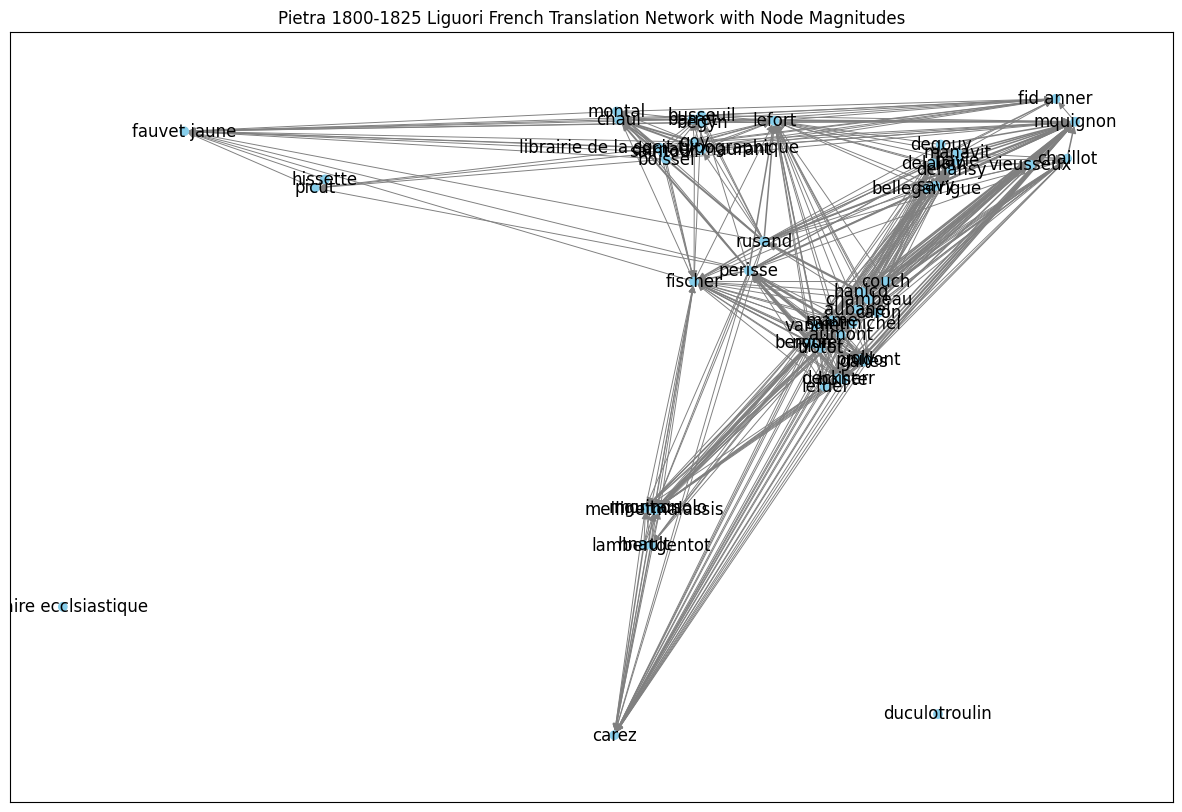

In [19]:
fig, ax = plt.subplots(figsize=(15, 10))

node_sizes = [G_combined.nodes[node].get('magnitude', 1) for node in G_combined.nodes()]

# Scale node sizes for better visualization (adjust scaling factor as needed)
node_sizes = [size * 36 for size in node_sizes]

pos = nx.spring_layout(G_combined)

edge_widths = [np.log(data['weight'] + 1) for _, _, data in G_combined.edges(data=True)]
#edge_widths = [data['weight'] for _, _, data in G_combined.edges(data=True)]

nx.draw_networkx(G_combined, pos, node_size=node_sizes, with_labels=True,
        alpha=1, node_color='skyblue', width=edge_widths, edge_color='gray', arrows=True)

plt.title("Pietra 1800-1825 Liguori French Translation Network with Node Magnitudes")

plt.savefig('PIETRA_Margento_19th_Cent_Liguori_1800-1825_FR_w_Node_Magnitudes.png')

plt.show()

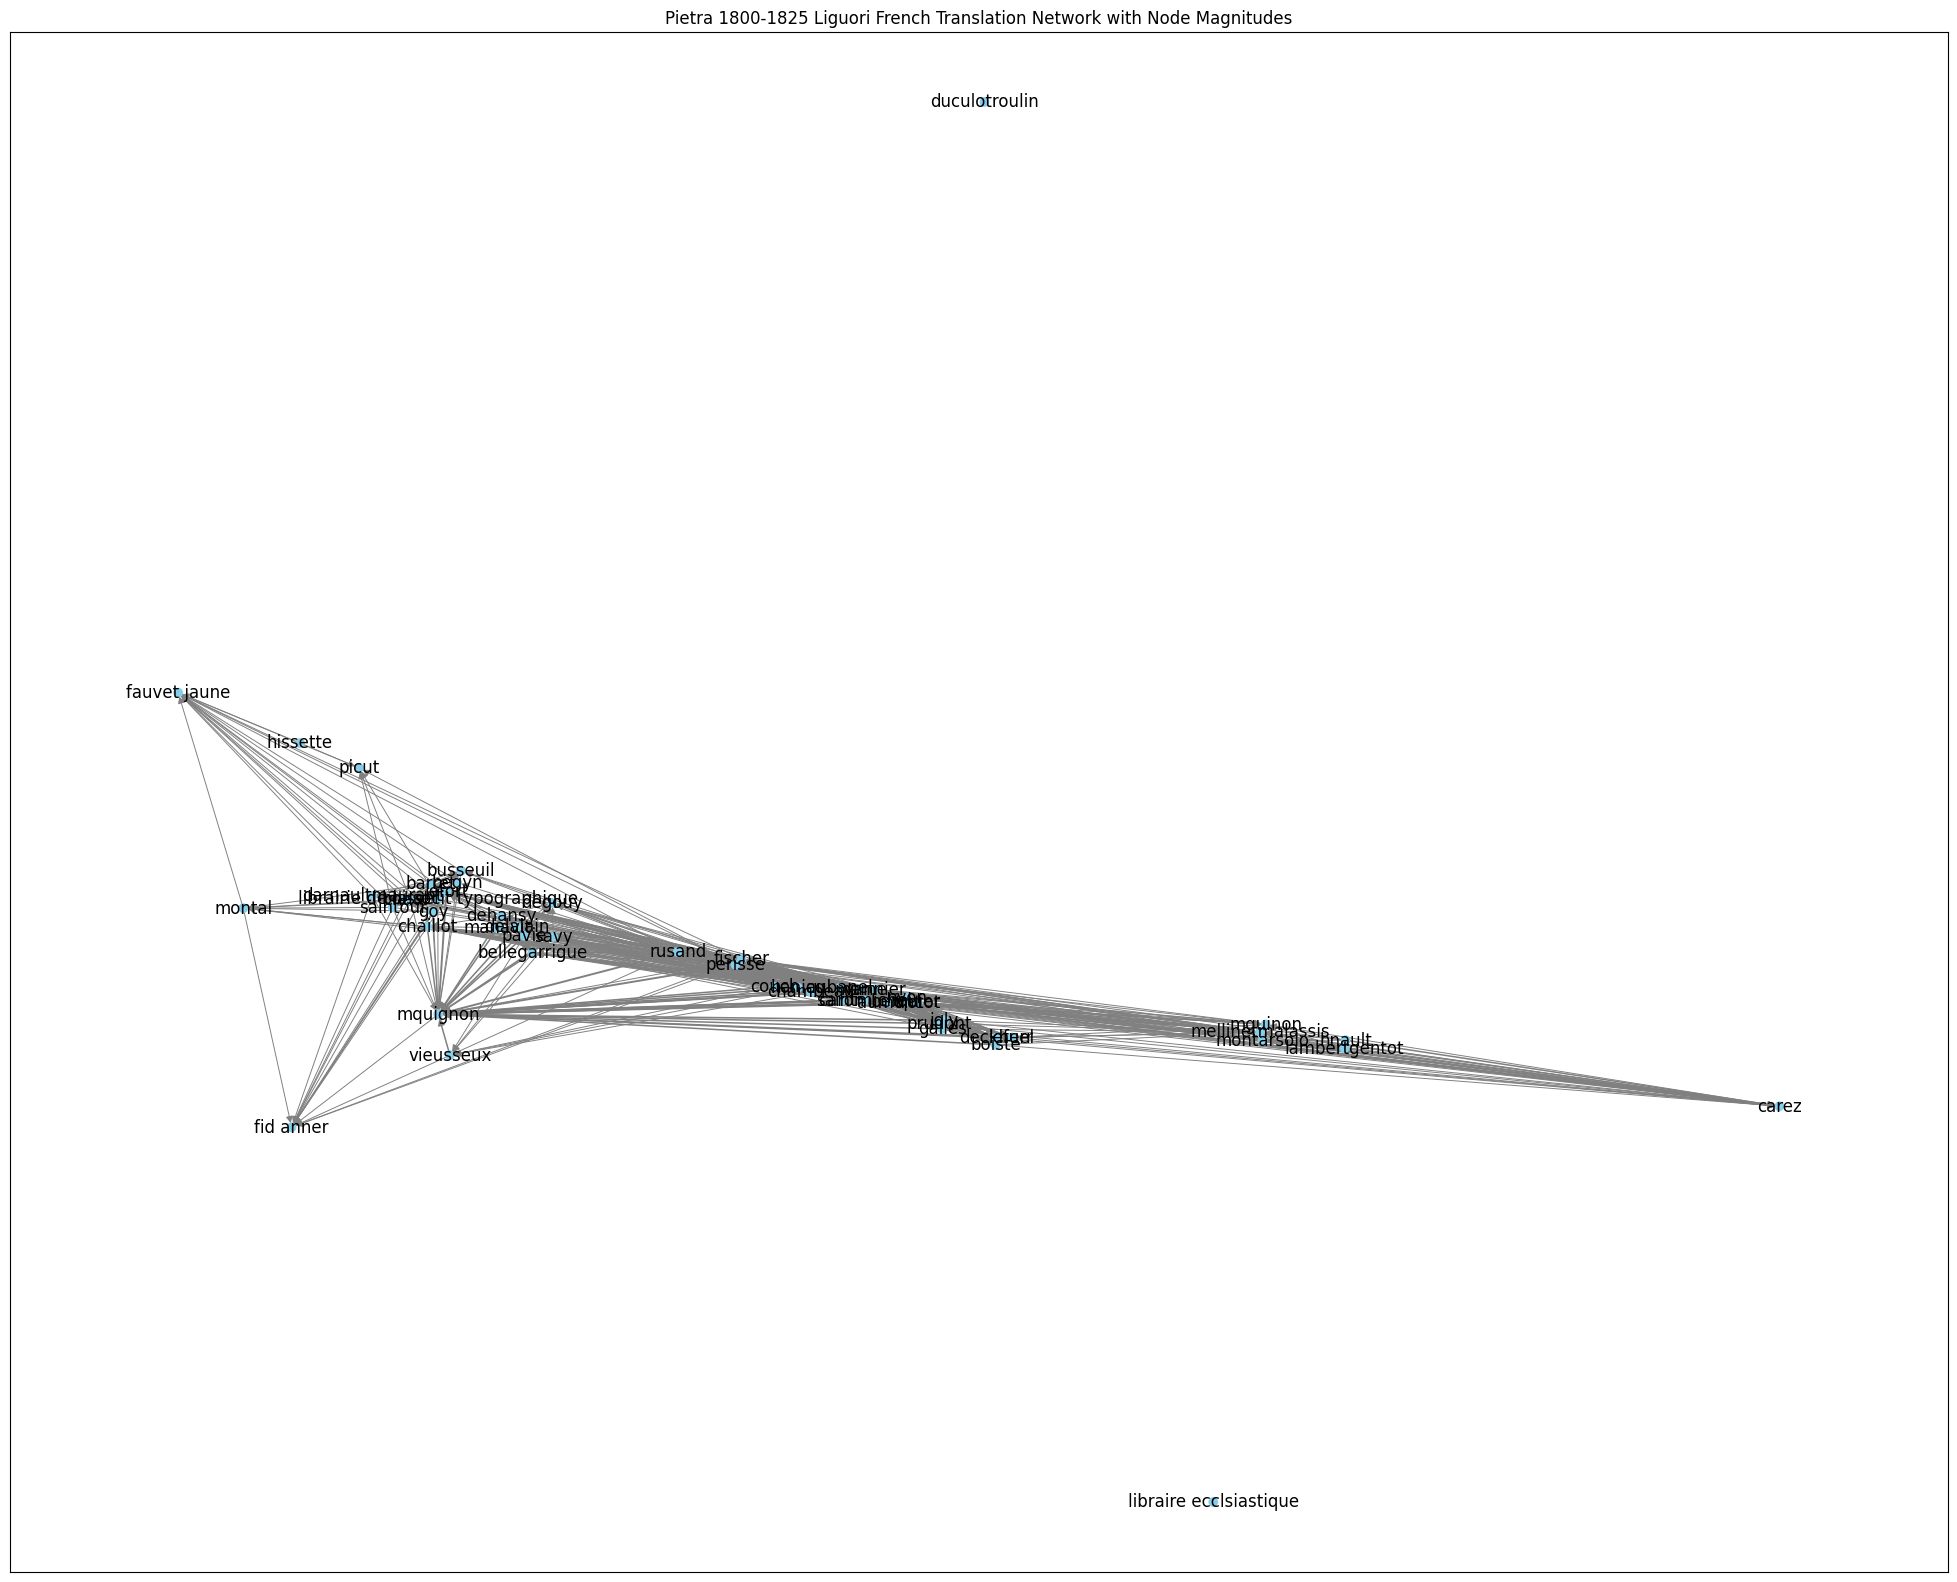

In [20]:
fig, ax = plt.subplots(figsize=(25, 20))

node_sizes = [G_combined.nodes[node].get('magnitude', 1) for node in G_combined.nodes()]

# Scale node sizes for better visualization (adjust scaling factor as needed)
node_sizes = [size * 36 for size in node_sizes]

pos = nx.spring_layout(G_combined)

edge_widths = [np.log(data['weight'] + 1) for _, _, data in G_combined.edges(data=True)]
#edge_widths = [data['weight'] for _, _, data in G_combined.edges(data=True)]

nx.draw_networkx(G_combined, pos, node_size=node_sizes, with_labels=True,
        alpha=1, node_color='skyblue', width=edge_widths, edge_color='gray', arrows=True)

plt.title("Pietra 1800-1825 Liguori French Translation Network with Node Magnitudes")

plt.savefig('PIETRA_Margento_19th_Cent_Liguori_1800-1825_FR_w_Node_Magnitudes1.png')

plt.show()

Debugging:

In [66]:
list(G_thru_1825.edges(keys=True, data=True))

[('hissette',
  'fauvet jaune',
  'reprint_hissette_fauvet jaune_Instruction sur le Chemin de La Croix, avec les pratiques de cette dévotion, dédiée à la Très-Sainte Vierge_1',
  {'title': 'Instruction sur le Chemin de La Croix, avec les pratiques de cette dévotion, dédiée à la Très-Sainte Vierge',
   'source_years': [1824],
   'target_years': [1825],
   'source_translator': [],
   'target_translator': [],
   'source_num_editions': [1],
   'target_num_editions': [1],
   'source_place': [['Nancy']],
   'target_place': [['Bayonne']],
   'weight': 1,
   'relation': 'reprint'}),
 ('hissette',
  'picut',
  'copub_hissette_picut_Instruction sur le Chemin de La Croix, avec les pratiques de cette dévotion, dédiée à la Très-Sainte Vierge_1',
  {'title': 'Instruction sur le Chemin de La Croix, avec les pratiques de cette dévotion, dédiée à la Très-Sainte Vierge',
   'source_years': [1824],
   'target_years': [1824],
   'source_translator': [],
   'target_translator': [],
   'source_num_editions'

In [72]:
for u, v, key, attr in G_thru_1825.edges(keys=True, data=True):
    # if data['weight'] != 1:
        print(f"Edge ({u}, {v}, {key}): {weight}")

Edge (hissette, fauvet jaune, reprint_hissette_fauvet jaune_Instruction sur le Chemin de La Croix, avec les pratiques de cette dévotion, dédiée à la Très-Sainte Vierge_1): 1
Edge (hissette, picut, copub_hissette_picut_Instruction sur le Chemin de La Croix, avec les pratiques de cette dévotion, dédiée à la Très-Sainte Vierge_1): 1
Edge (degouy, galles, reprint_degouy_galles_Visite au S. Sacrement et à  la Sainte Vierge_1): 1
Edge (degouy, prudont, reprint_degouy_prudont_Visite au S. Sacrement et à  la Sainte Vierge_1): 1
Edge (degouy, delalain, copub_degouy_delalain_Visite au S. Sacrement et à  la Sainte Vierge_1): 1
Edge (degouy, perisse, reprint_degouy_perisse_Visite au S. Sacrement et à  la Sainte Vierge_1): 1
Edge (degouy, mellinetmalassis, reprint_degouy_mellinetmalassis_Visite au S. Sacrement et à  la Sainte Vierge_1): 1
Edge (degouy, carez, reprint_degouy_carez_Visite au S. Sacrement et à  la Sainte Vierge_1): 1
Edge (degouy, manavit, reprint_degouy_manavit_Visite au S. Sacrement

In [75]:

for u, v, key, attr in G_thru_1825.edges(keys=True, data=True):
    if not attr['weight']:
        print(f"Edge ({u}, {v}, {key}): {attr}")

In [76]:

for u, v, key, attr in G_thru_1825.edges(keys=True, data=True):
    if attr['weight'] != 1:
        print(f"Edge ({u}, {v}, {key}): {attr}")

Edge (degouy, perisse, reprint_degouy_perisse_Visite au S. Sacrement et à  la Sainte Vierge_1): {'title': 'Visite au S. Sacrement et à\xa0 la Sainte Vierge', 'source_years': [1816], 'target_years': [1817, 1819, 1821, 1823, 1825], 'source_translator': [], 'target_translator': [], 'source_num_editions': [1], 'target_num_editions': [5], 'source_place': [['Saumur']], 'target_place': [['Lyon']], 'weight': 5, 'relation': 'reprint'}
Edge (degouy, mquignon, reprint_degouy_mquignon_Visite au S. Sacrement et à  la Sainte Vierge_1): {'title': 'Visite au S. Sacrement et à\xa0 la Sainte Vierge', 'source_years': [1816], 'target_years': [1824, 1825], 'source_translator': [], 'target_translator': [], 'source_num_editions': [1], 'target_num_editions': [2], 'source_place': [['Saumur']], 'target_place': [['Paris']], 'weight': 2, 'relation': 'reprint'}
Edge (savy, perisse, reprint_savy_perisse_Visite au S. Sacrement et à  la Sainte Vierge_1): {'title': 'Visite au S. Sacrement et à\xa0 la Sainte Vierge', '